In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.9014 - loss: 0.3264 - val_accuracy: 0.9827 - val_loss: 0.0645
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9816 - loss: 0.0593 - val_accuracy: 0.9842 - val_loss: 0.0534
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9893 - loss: 0.0345 - val_accuracy: 0.9860 - val_loss: 0.0536


In [ ]:
def get_batch_image():
    digits = []
    labels = []
    for _ in range(3):
        i = random.randint(0, len(X_test)-1)
        digits.append(X_test[i].reshape(28, 28))
        labels.append(y_test[i])
    img = np.hstack(digits)
    return img, labels

In [ ]:
batch_img, true_labels = get_batch_image()

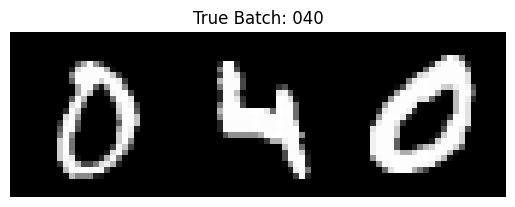

In [ ]:
plt.imshow(batch_img, cmap='gray')
plt.title(f"True Batch: {''.join(map(str, true_labels))}")
plt.axis('off')
plt.show()

In [ ]:
def predict_digits(image):
    predictions = []
    for i in range(0, image.shape[1], 28):
        digit = image[:, i:i+28].reshape(1, 28, 28, 1)
        pred = np.argmax(model.predict(digit, verbose=0))
        predictions.append(pred)
    return predictions

In [ ]:
predicted = predict_digits(batch_img)

print("True Batch:      ", ''.join(map(str, true_labels)))
print("Predicted Batch: ", ''.join(map(str, predicted)))

True Batch:       040
Predicted Batch:  040
